<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/regresion-logistica/Regresi%C3%B3n_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

La regresión logística es un métdo de clasificación binaria, es decir, la variable dependiente sólo puede tomar dos valores: Verdadero ó Falso, 1 ó 0, etc.

Se denomina regresión logística ya que el corazón del método es la llamada función logística o función sigmoide, la cual es de la forma:

\begin{equation}
  \sigma(z)=\frac{1}{1+e^{-z}}
\end{equation}

Se usa el método de regresión logística para modelar variables dependientes binarias en lugar de la regresión lineal, ya que esta última, para valores que se encuentran en los extremos de la recta predicha entrega valores menores a cero y mayores a uno. Esto va en contra de la definición teórica de probabilidad, según la cual estas están en el rango $[0, 1]$.

Entonces el método de regresión logística utiliza la recta generada por la regresión lineal pero la pasa por la función sigmoide para que el resultado siempre esté entre 0 y 1. En otras palabras, el problema de regresión se convierte en un problema de clasificación.

Dado un conjunto de datos, suponemos que podemos modelarlo con una expresión matemática de la forma:

\begin{equation}
y=wx+b
\end{equation}

Esta ecuación es una representación lineal de la relación que existe entre los datos de entrada $x$ (características) y la salida $y$. Donde $y$ se puede expresar de la forma:


\begin{equation}
\hat{y}^{(i)}=w_0+w_1x_1^{(i)}+w_2x_2^{(i)}+...+w_nx_n^{(i)}
\end{equation}

Para clasificación se necesita acotar este resultado a valores de $y$ entre $[0, 1]$ por lo que necesitamos pasar este resultado a través de la función de activación sigmoide:

 \begin{equation}
  \sigma(\hat y)=P(\hat{y}^{(i)}=1)=\frac{1}{1+e^{-(w_0+w_1x_1^{(i)}+w_2x_2^{(i)}+...+w_nx_n^{(i)})}}
\end{equation}

# Funci'on de costo (cross entropy)


Gráficamente la función sigmoide tiene la siguiente forma:

In [1]:
#import requests

#url = 'https://github.com/juanchess98/Notebooks-Deep-Learning.git'

#request = requests.get(url)

In [18]:
#import sys
#sys.path.insert(0,'/content/helpers.py')

In [12]:
import helpers
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%load_ext autoreload
%autoreload 2

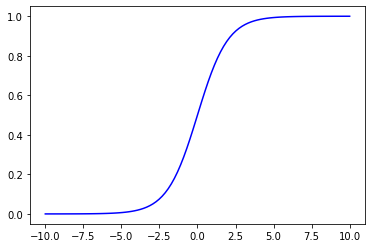

In [14]:
sigmoide = lambda x: 1/(1+np.exp(-x))
senal = helpers.crear_db(sigmoide, ruido=0, rango=(-10, 10))
helpers.plot_data(senal[0], senal[1], label='Sigmoide')

In [4]:
#Representación grafica

# Optimización

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

#### Se carga la API Keras corriendo sobre la plataforma Tensorflow 2.

In [4]:
import tensorflow.keras as keras
import tensorflow as tf

#### Se crean datos artificiales con la clase datasets de sklearn.

En este ejercicio se crean cien datos repartidos en dos clases. Estos datos se dividen luego en 80% para clasificación 10% para validación y el 10% restante para prueba.

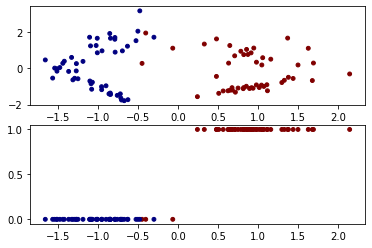

In [54]:
X_, y_ = datasets.make_classification(n_samples=100, n_features = 2, random_state=1, n_redundant=0)

fig = plt.figure()#(figsize=(5.0, 4.0))
ax = fig.add_subplot(211)
ax.scatter(X_[:,0],X_[:,1],s=15,c=y_.squeeze(),cmap='jet')
ax1 = fig.add_subplot(212)
r=np.where(sigmoide(X_[:,0]) > 0.5, 1, 0)
ax1.scatter(X_[:,0], r, s=15,c=y_.squeeze(),cmap='jet')

# Implementacion de Regresión Logística en Keras de Tensorflow 2

## 1. Implementación de Regresión Logística usando el modo funcional de keras

La API funcional de Keras es el modo más flexible de crear modelos en esta API ya que permite implementar topologías no-lineales, compartir capas y modelos de múltiples entradas-múltiples salidas.

La idea detrás de esto es que un modelo de aprendizaje profundo es un grafo acíclico dirigido (DAG, por sus siglas en inglés) de capas. Por lo tanto la API funcional es un modo de construir grafos de capas.

### Se crea el modelo para el ejercicio de regresión logística:

In [69]:
def reg_logistica(dim):

    """
    Implementación con Keras funcional
    """
    
    # Se comienza a crear el grafo creando un nodo de entrada con la función Input y en cuyo argumento se
    # especifica el numero de características de la entrada.
    # Ejm: En el caso de una imagen RGB de 24x24 pixeles: dim = (24, 24, 3)
    
    inputs = tf.keras.layers.Input(shape=dim)
    
    # Ahora se crea un nuevo nodo en el grafo de capas. Se pasa lo que hay en inputs 
    # por una capa densa y el resultado se pasa por la función de activación sigmoide.
    # El resultado 'outputs' es un tensor de dimensión 1.
    preds = tf.keras.layers.Dense(1, activation='sigmoid')(inputs)
    
    # Se crea el modelo
    model = tf.keras.models.Model(inputs=inputs,outputs=preds)
    
    return model

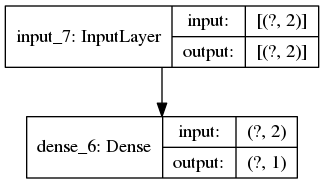

In [73]:
model_logistic = reg_logistica(X_[:80,:80].shape[1])
keras.utils.plot_model(model_logistic, show_shapes=True)

### Compilación del modelo

El entrenamiento, evaluación y predicción funcionan de la misma forma tanto en el modelo funcional como en el modelo secuencial de Keras.

Se define el descenso del gradiente como optimizador de la función de costo entropía cruzada binaria y se compila el modelo 

In [74]:
taza_aprendizaje = 0.5
sgd = keras.optimizers.SGD(lr=taza_aprendizaje)
model_logistic.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])

### Entrenamiento

In [75]:
model_logistic.fit(X_[:80,:80], y_[:80], batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
80/80 [==============================] - 0s 793us/step - loss: 0.1606 - binary_accuracy: 0.9500
Epoch 2/10
80/80 [==============================] - 0s 790us/step - loss: 0.0927 - binary_accuracy: 0.9750
Epoch 3/10
80/80 [==============================] - 0s 828us/step - loss: 0.0820 - binary_accuracy: 0.9750
Epoch 4/10
80/80 [==============================] - 0s 815us/step - loss: 0.0769 - binary_accuracy: 0.9750
Epoch 5/10
80/80 [==============================] - 0s 766us/step - loss: 0.0736 - binary_accuracy: 0.9750
Epoch 6/10
80/80 [==============================] - 0s 815us/step - loss: 0.0713 - binary_accuracy: 0.9750
Epoch 7/10
80/80 [==============================] - 0s 808us/step - loss: 0.0695 - binary_accuracy: 0.9750
Epoch 8/10
80/80 [==============================] - 0s 802us/step - loss: 0.0680 - binary_accuracy: 0.9750
Epoch 9/10
80/80 [==============================] - 0s 836us/step - loss: 0.0667 - binary_accuracy: 0.9750
Epoch 10/10
80/80 [==================

In [16]:
model_logistic.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 1)]           0         
_________________________________________________________________
dense (Dense)                (None, 80, 1)             2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(len(model_logistic.layers[1].weights))
print(model_logistic.layers[1].weights[0])
print(model_logistic.layers[1].weights[1])
print(model_logistic.layers[1].get_weights()[0][0][0]) # Este es W
print(model_logistic.layers[1].get_weights()[1][0]) # Este es el bias b

2
<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.367681]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.7879043], dtype=float32)>
4.367681
0.7879043


In [18]:
W = model_logistic.layers[1].get_weights()[0][0][0]
b = model_logistic.layers[1].get_weights()[1][0]

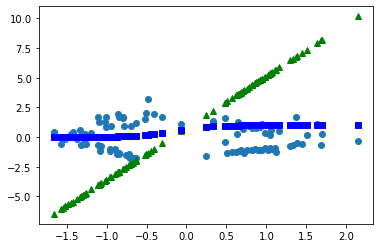

In [19]:
resultado = lambda x: W*x + b
plt.plot(X_[:,0],X_[:,1], 'o', X_[:,0], resultado(X_[:,0]), 'g^', X_[:,0], sigmoide(resultado(X_[:,0])), 'bs')
plt.show()

## Predicciones

In [20]:
predicciones = model_logistic.predict(X_[90:,0])
print(predicciones)
predicciones = np.where(predicciones>0.5, 1, 0).reshape((10,))
print(predicciones)
print(y_[90:])
res = np.sum(predicciones==y_[90:])
print(res)

[[[0.03276384]]

 [[0.97690415]]

 [[0.9989146 ]]

 [[0.37104762]]

 [[0.999962  ]]

 [[0.99257565]]

 [[0.05197042]]

 [[0.00436261]]

 [[0.99381375]]

 [[0.00766104]]]
[0 1 1 0 1 1 0 0 1 0]
[0 1 1 0 1 1 0 0 1 0]
10


# Graficar la salida de cada epoca?
# Graficar como desciende el gradiente

## 2. Implementación de Regresión Logística usando el modelo secuencial de Keras

In [24]:
def reg_logistica_2 (X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.1):
    dim = X_train.shape[1]
    print(X_train.shape)
    model = keras.Sequential()
    model.add(keras.Input(dim, ))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    sgd = keras.optimizers.SGD(lr=learning_rate) #SGD=Stochastic Gradient Descent
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
    model.fit(X_train, Y_train, batch_size=1, epochs=num_iterations, shuffle=False)
    return model

In [25]:
y_.shape

(100,)

In [26]:
seq_model = reg_logistica_2(X_[:80,:80], y_[:80], X_[80:90,80:90], y_[80:90], num_iterations=10)

(80, 2)
Epoch 1/10
80/80 [==============================] - 0s 751us/step - loss: 0.5995 - binary_accuracy: 0.7250
Epoch 2/10
80/80 [==============================] - 0s 821us/step - loss: 0.1959 - binary_accuracy: 0.9625
Epoch 3/10
80/80 [==============================] - 0s 781us/step - loss: 0.1405 - binary_accuracy: 0.9625
Epoch 4/10
80/80 [==============================] - 0s 931us/step - loss: 0.1176 - binary_accuracy: 0.9750
Epoch 5/10
80/80 [==============================] - 0s 830us/step - loss: 0.1048 - binary_accuracy: 0.9750
Epoch 6/10
80/80 [==============================] - 0s 834us/step - loss: 0.0966 - binary_accuracy: 0.9750
Epoch 7/10
80/80 [==============================] - 0s 895us/step - loss: 0.0907 - binary_accuracy: 0.9750
Epoch 8/10
80/80 [==============================] - 0s 790us/step - loss: 0.0863 - binary_accuracy: 0.9750
Epoch 9/10
80/80 [==============================] - 0s 778us/step - loss: 0.0828 - binary_accuracy: 0.9750
Epoch 10/10
80/80 [==========

# Implementacion en Pytorch

In [12]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [13]:
X_, y_ = datasets.make_classification(n_samples=100, n_features = 6, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


n_samples, n_features = X_.shape

In [14]:
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

In [15]:
model = LogisticRegression(n_features)

In [16]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(params= model.parameters(),lr = learning_rate)

In [17]:
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    #backward
    loss.backward()

    ##update
    optimizer.step()

    optimizer.zero_grad() ## clean gradients to next iteration

    if(epoch+1) % 10 == 10:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

In [18]:
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy =  {acc:.4f}')

accuracy =  1.0000


In [19]:
#with torch.no_grad():
model.eval()
y_predicted = model(X_test)
y_predicted_cls = y_predicted.round()
acc2 = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
print(f'accuracy =  {acc2:.4f}')

accuracy =  1.0000


In [ ]:
#grafico

Explicación adicional